In [14]:
import numpy as np
import sklearn
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm

## Black-hole binary formation channels with gaussian mixtures.

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)


![Screen%20Shot%202022-01-15%20at%2013.34.38.png](attachment:Screen%20Shot%202022-01-15%20at%2013.34.38.png)

where they consider 5 possibilities for the formation of black hole binaries: common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).


Anyway. LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.


*Hint*: Note that the data provided are of shape (N,1), not (N,). This might be confusing at first, but it's the format that sklearn wants (more on this in a future lecture).  A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).

In [15]:
x=np.linspace(0, 5, 6)
print(x, x.shape)
print(x[np.newaxis,:], x[np.newaxis,:].shape)
print(x[:,np.newaxis], x[:,np.newaxis].shape)


[0. 1. 2. 3. 4. 5.] (6,)
[[0. 1. 2. 3. 4. 5.]] (1, 6)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)


The reshape() function is used to change the shape of an array without changing its data. The -1 and 1 in reshape(-1,1) have specific meanings:

- The 1 means we want one column.
- The -1 is a special placeholder that tells NumPy to automatically calculate the number of rows needed to accommodate all the data.

Purpose of reshape(-1,1):

- It transforms a 1D array into a 2D array with one column and as many rows as necessary.
This is often necessary because many scikit-learn functions expect 2D arrays as input, where each row is a sample and each column is a feature.


How it works:

- If x is a 1D array with 1000 elements, x.reshape(-1,1) will create a 2D array with shape (1000, 1).
- The -1 automatically becomes 1000 in this case, as that's the number of rows needed to fit all the data into one column.

## exercise: BH formation channels

Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




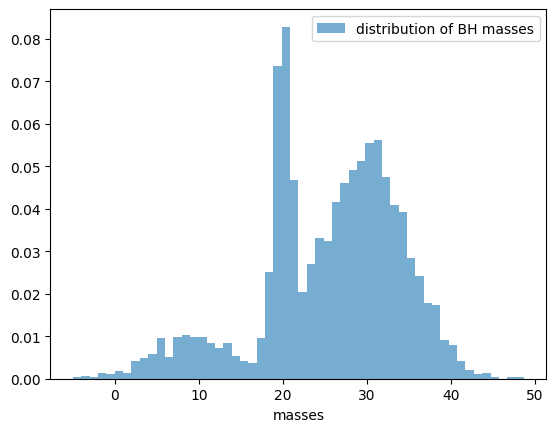

In [16]:
data = np.load("formationchannels.npy")
#print(data)
plt.hist(data, int(len(data)**0.5),  alpha=0.6, density=True, label = 'distribution of BH masses')
plt.xlabel('masses')
plt.legend()


#### vai a vederti https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html !!

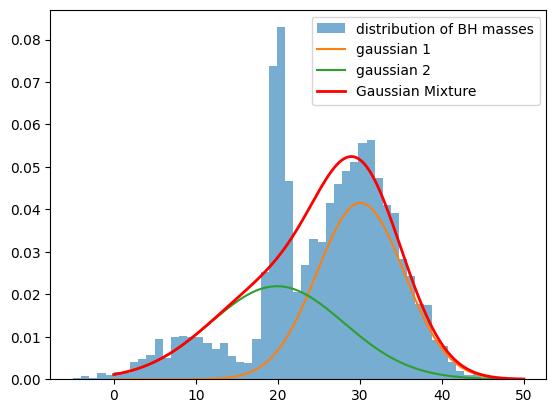

In [17]:
gm = GaussianMixture(n_components=2, random_state=0).fit(data)
#print(gm.means_)

x= np.linspace(0, 50, 1000).reshape(-1,1)

gaussian_1 = norm.pdf(x, gm.means_[0], np.sqrt(gm.covariances_[0]))
gaussian_2 = norm.pdf(x, gm.means_[1], np.sqrt(gm.covariances_[1]))

# I then need to multiply by the weights....

plt.hist(data, int(len(data)**0.5),  alpha=0.6, density=True, label = 'distribution of BH masses')

plt.plot(x, gaussian_1* gm.weights_[0], label='gaussian 1')
plt.plot(x, gaussian_2 * gm.weights_[1],  label='gaussian 2')

plt.plot(x, np.exp(gm.score_samples(x)), label='Gaussian Mixture', color='red', linewidth=2)

plt.legend()

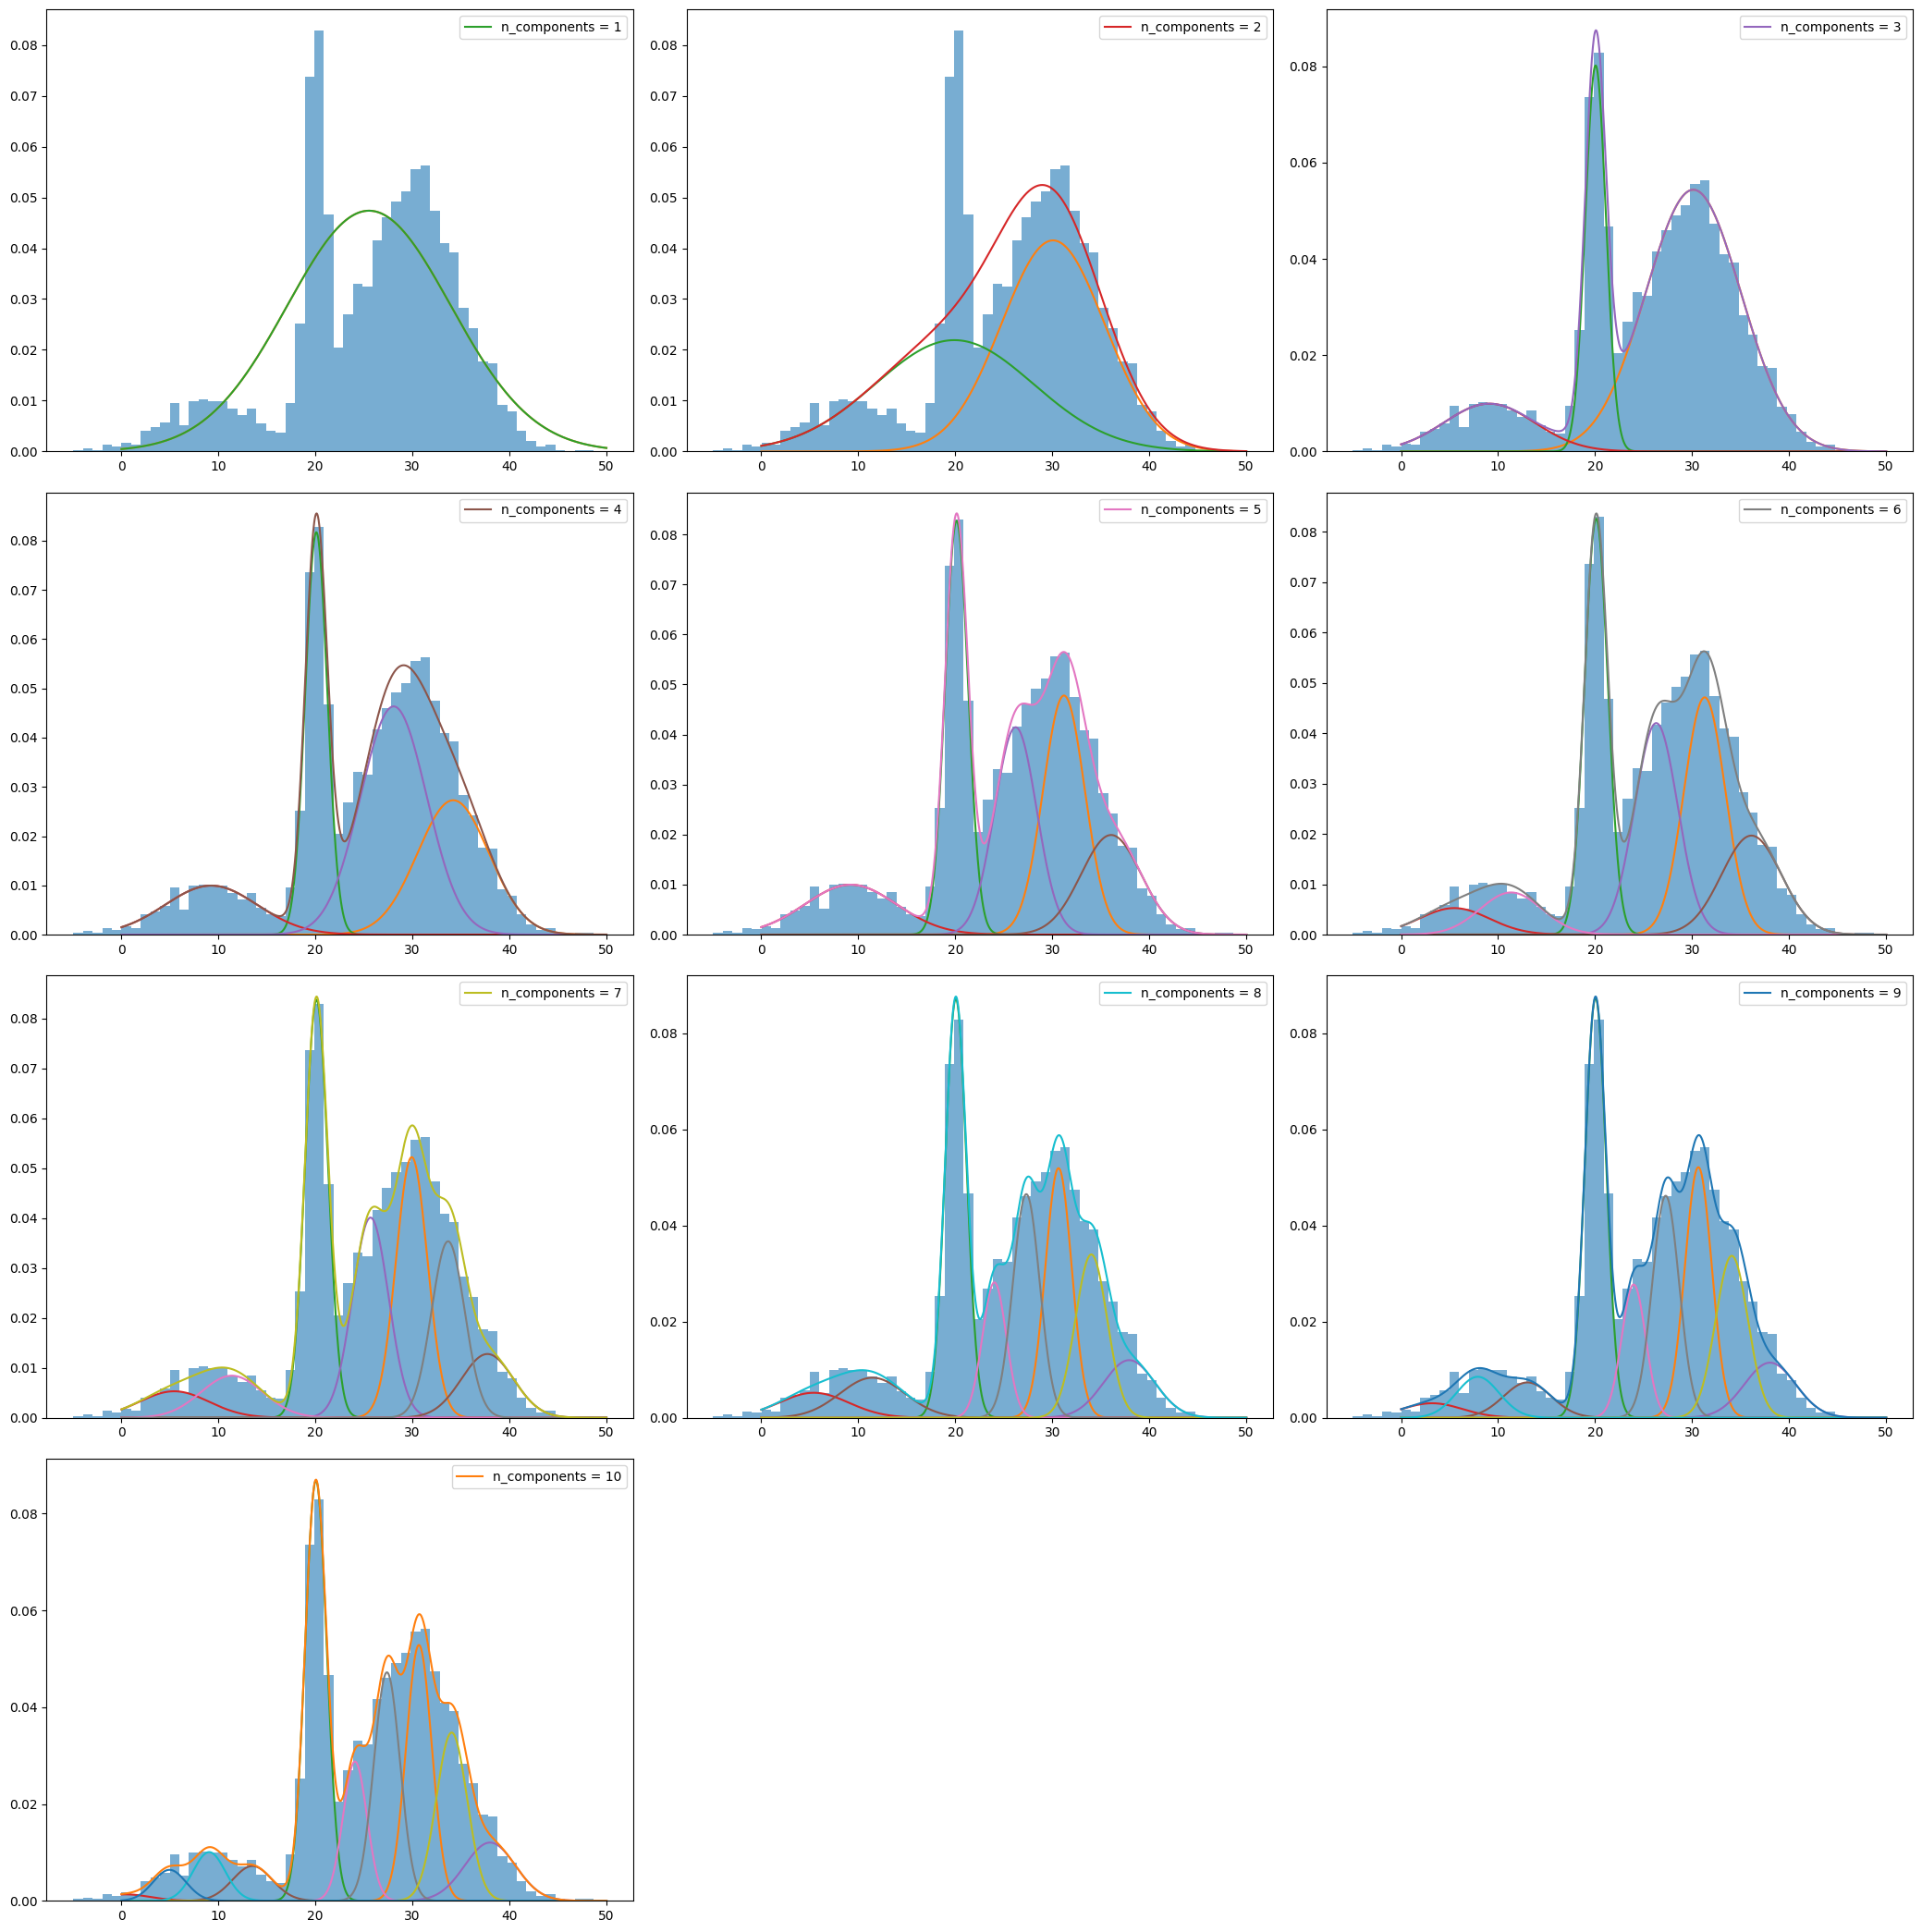

In [78]:
n_components = np.arange(1, 11)
x = np.linspace(0, 50, 1000).reshape(-1, 1)

aic = []
bic = []
fig, axs = plt.subplots(4, 3, figsize=(21, 21))


for idx, n in enumerate(n_components):
    
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]


    gm = GaussianMixture(n_components=n, random_state=0).fit(data)
    aic.append(gm.aic(data))
    bic.append(gm.bic(data))


    ax.hist(data, int(len(data)**0.5),  alpha=0.6, density=True)
    for i in range(n):
        gaussian = norm.pdf(x, gm.means_[i][0], np.sqrt(gm.covariances_[i][0]))


        ax.plot(x, gaussian * gm.weights_[i])
    ax.plot(x, np.exp(gm.score_samples(x)), label = 'n_components = '+str(n))
    ax.legend()
    #print(gm.score_samples(data))
    #print(gm.means_)
    #print(gm.covariances_)
  
plt.tight_layout()
fig.delaxes(axs[3, 1])
fig.delaxes(axs[3, 2])

plt.show()


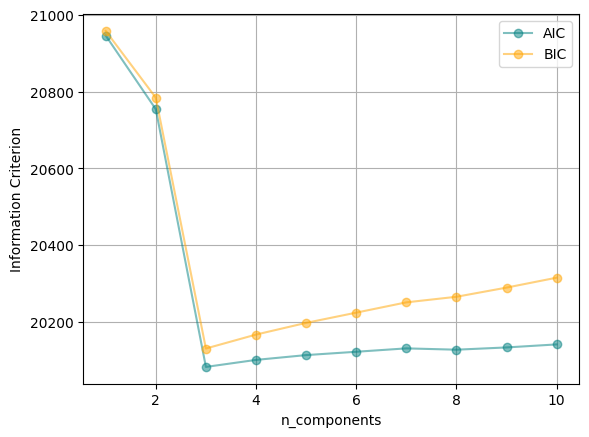

In [80]:
plt.plot(n_components, aic, color='teal',alpha=0.5, marker='o', label='AIC')
plt.plot(n_components, bic, color='orange',alpha=0.5, marker='o', label='BIC')
plt.xlabel('n_components')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid()
plt.show()

the minimum AIC is obtained for: 3 components
the minimum BIC is obtained for: 3 components
weights (1000, 3)


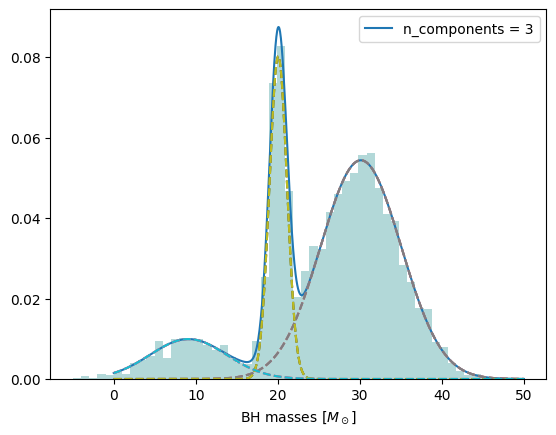

In [81]:
index_min_aic = np.argmin(aic)
index_min_bic = np.argmin(bic)
print("the minimum AIC is obtained for:", n_components[index_min_aic], "components")
print("the minimum BIC is obtained for:", n_components[index_min_bic], "components")
x = np.linspace(0, 50, 1000).reshape(-1, 1)
   
gm = GaussianMixture(n_components=3, random_state=0).fit(data)

weights = gm.predict_proba(x) #before I used the method weights_, but one can also use predict_proba
print("weights", weights.shape)
gaussians = np.exp(gm.score_samples(x)).reshape(-1,1)
single_gaussian = weights * gaussians


plt.hist(data, int(len(data)**0.5), color= 'teal', alpha=0.3, density=True)
plt.plot(x, np.exp(gm.score_samples(x)), label = 'n_components = '+str(3))

for i in range(3):
   plt.plot(x, single_gaussian, '--')

plt.xlabel('BH masses $[M_\odot]$')
plt.legend()